### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv

application_df = pd.read_csv("csvs/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

application_df.drop(["EIN", "NAME"], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.

n = application_df.nunique(axis=0)
print("Number of unique values in each column :\n", n)

Number of unique values in each column :
 APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning

application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

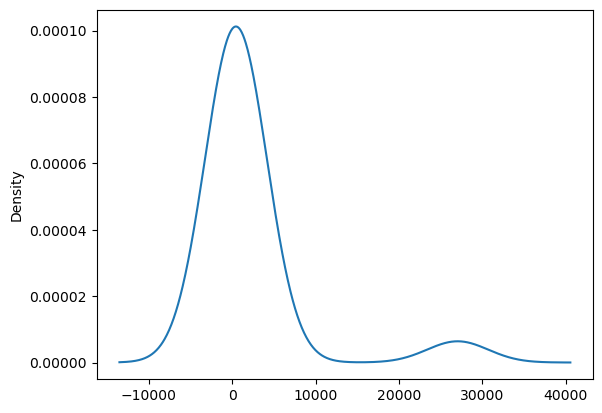

In [5]:
# Visualize the value counts of APPLICATION_TYPE

import matplotlib.pyplot as plt

application_counts.plot.density()
plt.show()

In [6]:
# Determine which values to replace if counts are less than ...?

replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe

for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(
        app, "Other"
    )

# Check to make sure binning was successful

application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning

class_counts = application_df.CLASSIFICATION.value_counts()
class_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Name: CLASSIFICATION, dtype: int64

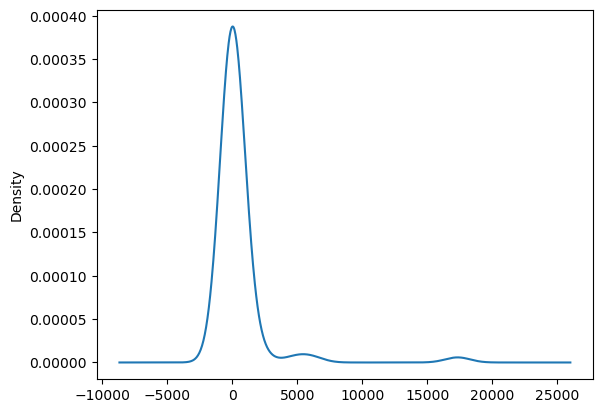

In [8]:
# Visualize the value counts of CLASSIFICATION

class_counts.plot.density()
plt.show()

In [9]:
# Determine which values to replace if counts are less than ..?

replace_class = list(class_counts[class_counts < 800].index)

# Replace in dataframe

for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")

# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists

application_cat = application_df.dtypes[
    application_df.dtypes == "object"
].index.tolist()

In [11]:
# Create a OneHotEncoder instance

enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list

encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe

encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals

application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

C:\Users\bcald\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays

y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Create a StandardScaler instances

scaler = StandardScaler()

# Fit the StandardScaler

X_scaler = scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
number_input_features = len(X_train[0])
number_input_features

43

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

number_input_features = len(X_train[0])

# First hidden layer
# Add our first Dense layer, including the input layer
# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

nn.add(
    tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features)
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
# Add the output layer that uses a probability activation function
# For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
# we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/100
  1/804 [..............................] - ETA: 7:35 - loss: 0.8599 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6793 - accuracy: 0.5970  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.6409 - accuracy: 0.6589
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.6263 - accuracy: 0.6795
Epoch 1: saving model to checkpoints\weights.01.hdf5



Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.5709 - accuracy: 0.7215
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5704 - accuracy: 0.7221
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5719 - accuracy: 0.7207
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5549 - accuracy: 0.7315
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5546 - accuracy: 0.7312
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7316
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7328
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7365
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7303
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.

557/804 [===================>..........] - ETA: 0s - loss: 0.5514 - accuracy: 0.7299
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5514 - accuracy: 0.7302
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5516 - accuracy: 0.7300
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5513 - accuracy: 0.7304
Epoch 3: saving


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5490 - accuracy: 0.7336
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5501 - accuracy: 0.7315
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5487 - accuracy: 0.7324
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
353/804 [============>.................] - ETA

 22/804 [..............................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7301
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7292
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 59/804 [=>............................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7299
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7385
Epoch 5: saving


Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5480 - accuracy: 0.7331
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5482 - accuracy: 0.7325
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5477 - accuracy: 0.7325
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5491 - accuracy: 0.7304
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5470 - accuracy: 0.7319
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5471 - accuracy: 0.7317
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5514 - accuracy: 0.7340
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7367
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7396
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.


Epoch 7: saving model to checkpoints\weights.07.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7317
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5477 - accuracy: 0.7322
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5474 - accuracy: 0.7324
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
641/804 [======================>.......] - ETA


Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7365
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7342
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7332
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.


Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7306
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7340
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7372
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.

598/804 [=====================>........] - ETA: 0s - loss: 0.5489 - accuracy: 0.7317
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5481 - accuracy: 0.7322
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5478 - accuracy: 0.7327
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5471 - accuracy: 0.7330
Epoch 9: saving


Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7340
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7330
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7338
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkp


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.5518 - accuracy: 0.7214
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7266
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5495 - accuracy: 0.7262
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkp

590/804 [=====================>........] - ETA: 0s - loss: 0.5434 - accuracy: 0.7331
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5442 - accuracy: 0.7324
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5440 - accuracy: 0.7327
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7331
Epo


Epoch 12: saving model to checkpoints\weights.12.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7320
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5451 - accuracy: 0.7318
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7330
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
381/804 [=============>..........

 42/804 [>.............................] - ETA: 2s - loss: 0.5555 - accuracy: 0.7262
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7354
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 82/804 [==>...........................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7306
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
102/804 [==>...........................] - ETA: 1s - loss: 0.5537 - accuracy: 0.7258
Epo

582/804 [====================>.........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7362
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7367
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5451 - accuracy: 0.7355
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5452 - accuracy: 0.7354
Epo


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7337
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7334
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5475 - accuracy: 0.7318
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkp


Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7500
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 59/804 [=>............................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7405
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 79/804 [=>............................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7425
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkp


Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5451 - accuracy: 0.7328
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7329
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7331
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkp


Epoch 16: saving model to checkpoints\weights.16.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7378
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7370
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7365
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
360/804 [============>...........

 21/804 [..............................] - ETA: 2s - loss: 0.5607 - accuracy: 0.7098
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7264
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7234
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7249
Epo

561/804 [===================>..........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7359
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7367
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7370
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7367
Epo


Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7364
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7373
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7382
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkp


Epoch 19: saving model to checkpoints\weights.19.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.5651 - accuracy: 0.7158
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7179
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.5642 - accuracy: 0.7217
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7235
Epo

553/804 [===================>..........] - ETA: 0s - loss: 0.5438 - accuracy: 0.7353
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5448 - accuracy: 0.7343
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5441 - accuracy: 0.7348
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5447 - accuracy: 0.7346
Epo

279/804 [=========>....................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7388
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7374
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7394
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7389
Epo

  1/804 [..............................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7500
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.5332 - accuracy: 0.7472
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 40/804 [>.............................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7344
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.5507 - accuracy: 0.7193
Epo

540/804 [===================>..........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7375
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7372
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7374
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7378
Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7382
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7380
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7377
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkp

  1/804 [..............................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8125
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 22/804 [..............................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7188
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 42/804 [>.............................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7418
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 62/804 [=>......................

537/804 [===================>..........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7389
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7385
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7377
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7378
Epo

258/804 [========>.....................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7420
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7436
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7422
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7411
Epo

798/804 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7354
Epoch 24: saving model to checkpoints\weights.24.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5414 - accuracy: 0.7355
Epoch 25/100
  1/804 [..............................] - ETA: 1s - loss: 0.4977 - accuracy: 0.7188
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 22/804 [..............................] - ETA: 1s - loss: 0.5443 - accuracy: 0.7472
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
 40/804 [>.............................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7500
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: s

519/804 [==================>...........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7367
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5414 - accuracy: 0.7364
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5426 - accuracy: 0.7346
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7353
Epo

240/804 [=======>......................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7329
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7338
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5469 - accuracy: 0.7321
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7342
Epo

780/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7369
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5406 - accuracy: 0.7365
Epoch 27/100

Epoch 27: saving model to checkpoints\weights.27.hdf5
  1/804 [..............................] - ETA: 5s - loss: 0.6454 - accuracy: 0.6250
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7321
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\we


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5394 - accuracy: 0.7381
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7385
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7390
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkp

242/804 [========>.....................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7404
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7398
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7399
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7402
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epo


Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7370
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5405 - accuracy: 0.7365
Epoch 29/100
  1/804 [..............................] - ETA: 1s - loss: 0.4717 - accuracy: 0.7500
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
 23/804 [..............................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7446
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\we

503/804 [=================>............] - ETA: 0s - loss: 0.5398 - accuracy: 0.7372
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
523/804 [==================>...........] - ETA: 0s - loss: 0.5409 - accuracy: 0.7365
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7379
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7383
Epo


Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7412
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7405
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7394
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkp


Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7371
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5399 - accuracy: 0.7371
Epoch 30: saving model to checkpoints\weights.30.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5400 - accuracy: 0.7370
Epoch 31/100
  1/804 [..............................] - ETA: 1s - loss: 0.5854 - accuracy: 0.7500
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 23/804 [..............................] 


Epoch 31: saving model to checkpoints\weights.31.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5354 - accuracy: 0.7384
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7377
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7383
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
560/804 [===================>....

221/804 [=======>......................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7381
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
241/804 [=======>......................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7403
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7415
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7409
Epo

761/804 [===========================>..] - ETA: 0s - loss: 0.5394 - accuracy: 0.7382
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7382
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5399 - accuracy: 0.7376
Epoch 33/100
  1/804 [..............................] - ETA: 0s - loss: 0.5733 - accuracy: 0.7812
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\we


Epoch 33: saving model to checkpoints\weights.33.hdf5
492/804 [=================>............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7401
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 0.5367 - accuracy: 0.7396
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7385
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
552/804 [===================>....


Epoch 34: saving model to checkpoints\weights.34.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5427 - accuracy: 0.7357
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7353
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7351
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7356
Epo

753/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7366
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7363
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7363
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5399 - accuracy: 0.7366
Epoch 35/100
  1/804 [..............................] - ETA: 0s - loss: 0.7171 - accuracy: 0.6562
Epoch 35: s


Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.5389 - accuracy: 0.7399
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5400 - accuracy: 0.7385
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5397 - accuracy: 0.7385
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkp

200/804 [======>.......................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7397
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7385
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7388
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7392
Epo

740/804 [==========================>...] - ETA: 0s - loss: 0.5397 - accuracy: 0.7365
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5390 - accuracy: 0.7372
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7375
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5393 - accuracy: 0.7371


Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.5407 - accuracy: 0.7343
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5409 - accuracy: 0.7344
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7355
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkp

192/804 [======>.......................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7378
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7379
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7381
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7374
Epo

732/804 [==========================>...] - ETA: 0s - loss: 0.5382 - accuracy: 0.7368
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.5390 - accuracy: 0.7367
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5387 - accuracy: 0.7372
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7371
Epo

458/804 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.7392
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.5384 - accuracy: 0.7380
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5378 - accuracy: 0.7385
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7379
Epo

179/804 [=====>........................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7381
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7398
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7369
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7377
Epo

714/804 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7386
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5387 - accuracy: 0.7387
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.5393 - accuracy: 0.7380
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5392 - accuracy: 0.7380
Epo

440/804 [===============>..............] - ETA: 0s - loss: 0.5374 - accuracy: 0.7381
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5387 - accuracy: 0.7376
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5388 - accuracy: 0.7376
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7384
Epo


Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7415
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7387
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7388
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkp


Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7371
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7378
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7377
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkp


Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7399
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7399
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
482/804 [================>.............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7400
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkp

158/804 [====>.........................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7336
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7372
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7372
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7391
Epo

698/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7385
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5377 - accuracy: 0.7389
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7390
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7387
Epo


Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7401
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
454/804 [===============>..............] - ETA: 0s - loss: 0.5360 - accuracy: 0.7403
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.5363 - accuracy: 0.7398
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkp


Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5422 - accuracy: 0.7316
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5455 - accuracy: 0.7283
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7345
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkp


Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7379
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7377
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5381 - accuracy: 0.7383
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkp

413/804 [==============>...............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7412
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5334 - accuracy: 0.7414
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
451/804 [===============>..............] - ETA: 0s - loss: 0.5326 - accuracy: 0.7422
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
471/804 [================>.............] - ETA: 0s - loss: 0.5332 - accuracy: 0.7414
Epo


Epoch 48: saving model to checkpoints\weights.48.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7260
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.5483 - accuracy: 0.7240
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5484 - accuracy: 0.7239
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
202/804 [======>.................


Epoch 48: saving model to checkpoints\weights.48.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.5362 - accuracy: 0.7385
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7391
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7399
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
742/804 [========================


Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7380
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7392
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.5364 - accuracy: 0.7407
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkp


Epoch 50: saving model to checkpoints\weights.50.hdf5
134/804 [====>.........................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7365
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
154/804 [====>.........................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7380
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7398
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
194/804 [======>.................


Epoch 50: saving model to checkpoints\weights.50.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7373
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7372
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7377
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
734/804 [========================


Epoch 51: saving model to checkpoints\weights.51.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7387
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7385
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5375 - accuracy: 0.7389
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
460/804 [================>.......

121/804 [===>..........................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7423
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7398
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7389
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7396
Epo


Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7402
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7409
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7407
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkp


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7389
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7385
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 0.5385 - accuracy: 0.7377
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkp


Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7500
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.5227 - accuracy: 0.7516
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.5295 - accuracy: 0.7458
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkp


Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7376
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7379
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7379
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkp

374/804 [============>.................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7369
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7371
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7376
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7379
Epo

100/804 [==>...........................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7387
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7380
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7379
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7404
Epo

640/804 [======================>.......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7383
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7382
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7378
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7379
Epo


Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7456
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7457
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7442
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkp


Epoch 58: saving model to checkpoints\weights.58.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7345
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7358
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7377
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
157/804 [====>...................


Epoch 58: saving model to checkpoints\weights.58.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5361 - accuracy: 0.7401
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7410
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7417
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
697/804 [========================

358/804 [============>.................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7368
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7368
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7362
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7352
Epo

 79/804 [=>............................] - ETA: 1s - loss: 0.5217 - accuracy: 0.7607
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.5179 - accuracy: 0.7585
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.5235 - accuracy: 0.7518
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.5235 - accuracy: 0.7504
Epo

614/804 [=====================>........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7400
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5351 - accuracy: 0.7399
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5354 - accuracy: 0.7396
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7400
Epo

340/804 [===========>..................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7397
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7404
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7403
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7407
Epo


Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7415
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7447
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7464
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkp


Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5354 - accuracy: 0.7406
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7401
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7408
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkp


Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7380
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
362/804 [============>.................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7373
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7381
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkp

 58/804 [=>............................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7403
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 78/804 [=>............................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7444
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7369
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7357
Epo

598/804 [=====================>........] - ETA: 0s - loss: 0.5378 - accuracy: 0.7390
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7399
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5359 - accuracy: 0.7410
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7413
Epo

319/804 [==========>...................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7430
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7424
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5312 - accuracy: 0.7433
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7431
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epo

 40/804 [>.............................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7422
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 60/804 [=>............................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7516
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 80/804 [=>............................] - ETA: 1s - loss: 0.5238 - accuracy: 0.7551
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 0.5162 - accuracy: 0.7588
Epo

575/804 [====================>.........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7404
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5346 - accuracy: 0.7400
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7396
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5360 - accuracy: 0.7387
Epo

301/804 [==========>...................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7300
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7308
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7314
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7316
Epo


Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7221
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7248
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7285
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkp


Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7387
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7382
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7384
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkp


Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7383
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7391
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7401
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkp


Epoch 70: saving model to checkpoints\weights.70.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5163 - accuracy: 0.7467
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7348
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7410
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
 79/804 [=>......................

549/804 [===================>..........] - ETA: 0s - loss: 0.5359 - accuracy: 0.7388
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7391
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7398
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7400
Epo


Epoch 71: saving model to checkpoints\weights.71.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7391
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7384
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7397
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
340/804 [===========>............

  1/804 [..............................] - ETA: 4s - loss: 0.6051 - accuracy: 0.7188
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7396
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7424
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7372
Epo

541/804 [===================>..........] - ETA: 0s - loss: 0.5351 - accuracy: 0.7410
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5349 - accuracy: 0.7409
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5352 - accuracy: 0.7405
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7404
Epo


Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7413
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7423
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7434
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkp

Epoch 74/100
  1/804 [..............................] - ETA: 1s - loss: 0.5525 - accuracy: 0.7500
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5284 - accuracy: 0.7431
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7286
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5373 - accurac

538/804 [===================>..........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7411
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7418
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7411
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7412
Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7447
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7446
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
309/804 [==========>...................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7420
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkp


Epoch 75: saving model to checkpoints\weights.75.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5355 - accuracy: 0.7394
Epoch 76/100
  1/804 [..............................] - ETA: 1s - loss: 0.4246 - accuracy: 0.8438
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7351
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.5289 - accuracy: 0.7484
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\we


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7416
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7418
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5345 - accuracy: 0.7414
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkp

261/804 [========>.....................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7414
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7410
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7409
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7418
Epo


Epoch 77: saving model to checkpoints\weights.77.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5352 - accuracy: 0.7388
Epoch 78/100
  1/804 [..............................] - ETA: 0s - loss: 0.5020 - accuracy: 0.7500
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5165 - accuracy: 0.7516
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5267 - accuracy: 0.7382
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\we


Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7374
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7383
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5360 - accuracy: 0.7378
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkp


Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7373
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7376
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7376
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkp

783/804 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7393
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7391
Epoch 79: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5352 - accuracy: 0.7391
Epoch 80/100
  1/804 [..............................] - ETA: 0s - loss: 0.5194 - accuracy: 0.7188
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 21/804 [..............................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7202
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: s


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7404
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7410
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7405
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkp


Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7432
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7417
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7420
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkp


Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7391
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5349 - accuracy: 0.7399
Epoch 82/100

Epoch 82: saving model to checkpoints\weights.82.hdf5
  1/804 [..............................] - ETA: 5s - loss: 0.5875 - accuracy: 0.6875
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.5183 - accuracy: 0.7396
Epoch 82: saving model to checkpoints\we


Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7405
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7399
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7393
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkp


Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5269 - accuracy: 0.7463
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7459
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7453
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkp


Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7416
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7415
Epoch 83: saving model to checkpoints\weights.83.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5348 - accuracy: 0.7410
Epoch 84/100
  1/804 [..............................] - ETA: 0s - loss: 0.4795 - accuracy: 0.7500
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\we


Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.5363 - accuracy: 0.7387
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7386
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7388
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkp

214/804 [======>.......................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7367
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7354
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7386
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7371
Epo

754/804 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7395
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7389
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7391
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5355 - accuracy: 0.7392
Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.4463 - accuracy: 0.7812
Epoch 86: s

480/804 [================>.............] - ETA: 0s - loss: 0.5356 - accuracy: 0.7404
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
500/804 [=================>............] - ETA: 0s - loss: 0.5356 - accuracy: 0.7406
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7406
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7400
Epo


Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7460
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7434
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5311 - accuracy: 0.7446
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkp


Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7404
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7401
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5343 - accuracy: 0.7402
Epoch 87: saving model to checkpoints\weights.87.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5346 - accuracy: 0.7403
Epoch 88/100
  1/804 [..............................] 


Epoch 88: saving model to checkpoints\weights.88.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7387
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5367 - accuracy: 0.7394
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.5357 - accuracy: 0.7403
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
537/804 [===================>....

198/804 [======>.......................] - ETA: 1s - loss: 0.5266 - accuracy: 0.7467
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7458
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5279 - accuracy: 0.7462
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.5272 - accuracy: 0.7472
Epo

738/804 [==========================>...] - ETA: 0s - loss: 0.5349 - accuracy: 0.7394
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5346 - accuracy: 0.7401
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7398
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.7404
Epo

459/804 [================>.............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7411
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5313 - accuracy: 0.7403
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5314 - accuracy: 0.7404
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7397
Epo

180/804 [=====>........................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7302
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7362
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5323 - accuracy: 0.7366
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7384
Epo

715/804 [=========================>....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7402
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5350 - accuracy: 0.7397
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7404
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5342 - accuracy: 0.7400
Epo

441/804 [===============>..............] - ETA: 0s - loss: 0.5341 - accuracy: 0.7368
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7369
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7366
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.5353 - accuracy: 0.7375
Epo


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7447
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7444
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5252 - accuracy: 0.7461
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkp


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7399
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5351 - accuracy: 0.7402
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7396
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkp

428/804 [==============>...............] - ETA: 1s - loss: 0.5322 - accuracy: 0.7408
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
448/804 [===============>..............] - ETA: 0s - loss: 0.5328 - accuracy: 0.7404
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
468/804 [================>.............] - ETA: 0s - loss: 0.5320 - accuracy: 0.7414
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5319 - accuracy: 0.7410
Epo


Epoch 95: saving model to checkpoints\weights.95.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7431
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7420
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7447
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
219/804 [=======>................


Epoch 95: saving model to checkpoints\weights.95.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7409
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7411
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7407
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
759/804 [========================

420/804 [==============>...............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7395
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
440/804 [===============>..............] - ETA: 0s - loss: 0.5339 - accuracy: 0.7401
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
460/804 [================>.............] - ETA: 0s - loss: 0.5351 - accuracy: 0.7393
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
480/804 [================>.............] - ETA: 0s - loss: 0.5352 - accuracy: 0.7387
Epo

141/804 [====>.........................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7402
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7395
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7427
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7396
Epo

681/804 [========================>.....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7394
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7396
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7399
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5352 - accuracy: 0.7397
Epo


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7390
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.5337 - accuracy: 0.7404
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
462/804 [================>.............] - ETA: 0s - loss: 0.5329 - accuracy: 0.7409
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkp

138/804 [====>.........................] - ETA: 1s - loss: 0.5230 - accuracy: 0.7464
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
158/804 [====>.........................] - ETA: 1s - loss: 0.5267 - accuracy: 0.7449
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7430
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7415
Epo

673/804 [========================>.....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7388
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5343 - accuracy: 0.7389
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7389
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7391
Epo


Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7365
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5386 - accuracy: 0.7369
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.5376 - accuracy: 0.7383
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 

<AxesSubplot:>

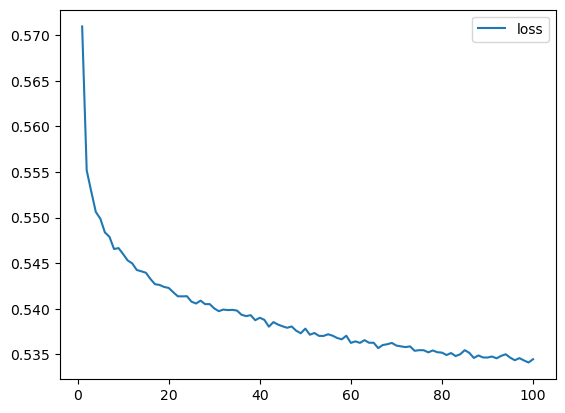

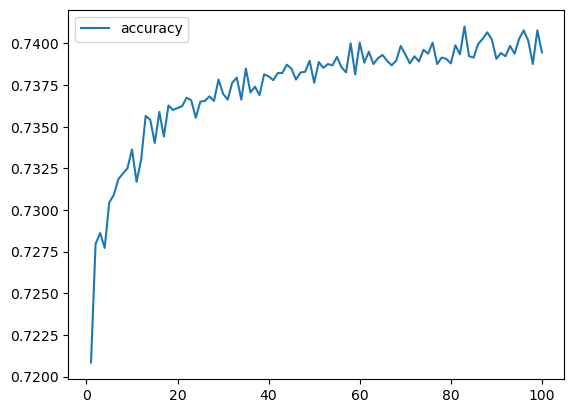

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5
)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

# Create a DataFrame containing training history
history_df = pd.DataFrame(
    fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1)
)

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5630 - accuracy: 0.7273 - 277ms/epoch - 1ms/step
Loss: 0.5630449652671814, Accuracy: 0.7273469567298889


In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")